# 1. CARGAS INICIALES

In [1]:
!pip install feature_engine

In [2]:
import pickle
from tempfile import mkdtemp
from shutil import rmtree

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import set_config
from sklearn.base import clone
import seaborn as sns
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from feature_engine.preprocessing import MatchVariables
from feature_engine.encoding import RareLabelEncoder, OrdinalEncoder, OneHotEncoder
from feature_engine.imputation import (
    AddMissingIndicator, MeanMedianImputer, CategoricalImputer, EndTailImputer
)
from feature_engine.transformation import PowerTransformer
from feature_engine.creation import RelativeFeatures
from feature_engine.selection import DropFeatures

In [3]:
df = pd.read_csv('/Users/origen.csv')

In [4]:
df_test = pd.read_csv('/Users/testeo.csv')

In [5]:
df

Id  averageRating  numVotes  titleType  isAdult  startYear  \
0            0            6.0         7   tvSeries      0.0       2019   
1            1            6.9        42  tvEpisode      0.0       2011   
2            2            7.8         8  tvEpisode      0.0       2016   
3            3            8.2       115  tvEpisode      0.0       1992   
4            4            5.8        74      movie      0.0       1961   
...        ...            ...       ...        ...      ...        ...   
977536  977536            6.8       118      movie      0.0       2016   
977537  977537            7.3        91      movie      0.0       1994   
977538  977538            8.3      9491      movie      0.0       1995   
977539  977539            7.0       811      short      0.0       1943   
977540  977540            9.0       488  tvEpisode      0.0       1987   

        endYear  runtimeMinutes                 genres_x  \
0             0               0                     News   
1             0              46       Comedy,Crime,Drama   
2             0              45      Documentary,History   
3             0              30             Comedy,Drama   
4             0             103                  Western   
...         ...             ...                      ...   
977536        0              87              Documentary   
977537        0             115              Documentary   
977538        0             145       Action,Crime,Drama   
977539        0               8  Animation,Comedy,Family   
977540        0              30             Comedy,Drama   

                            directors  ...  \
0       nm1635586,nm1230149,nm2085337  ...   
1                           nm3398609  ...   
2                                   0  ...   
3                           nm0067621  ...   
4                           nm0060430  ...   
...                               ...  ...   
977536                      nm0068385  ...   
977537            nm0007366,nm0062743  ...   
977538                      nm0471452  ...   
977539                      nm0293989  ...   
977540                      nm0400958  ...   

                                                 overview  popularity  \
0                                                     NaN         NaN   
1                                                     NaN         NaN   
2                                                     NaN         NaN   
3                                                     NaN         NaN   
4                                                     NaN         NaN   
...                                                   ...         ...   
977536                                                NaN         NaN   
977537  Brother Minister reveals the mystery surroundi...    0.036800   
977538  Auto rickshaw driver Manickam avoids violence ...    0.704162   
977539                                                NaN         NaN   
977540                                                NaN         NaN   

                            production_companies  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
...                                          ...   
977536                                       NaN   
977537                                        []   
977538  [{'name': 'Sathya Movies', 'id': 16434}]   
977539                                       NaN   
977540                                       NaN   

                           production_countries release_date     revenue  \
0                                           NaN          NaN         NaN   
1                                           NaN          NaN         NaN   
2                                           NaN          NaN         NaN   
3                                          

# 2. ANALISIS INICIAL

In [6]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (977541, 31)
Nombre columnas: Index(['Id', 'averageRating', 'numVotes', 'titleType', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres_x', 'directors', 'writers',
       'seasonNumber', 'episodeNumber', 'ordering', 'language', 'attributes',
       'isOriginalTitle', 'adult', 'budget', 'genres_y', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'video'],
      dtype='object')


In [7]:
df['id']= df['Id']
df_test['id']= df_test['Id']

In [8]:
#preparacion data frame- separo el nombre de las columnas
columns=list(df.columns)
datavalues=df[:].values

In [9]:
df=pd.DataFrame(data=datavalues,columns=columns)

In [10]:
print('Tipos de datos: ')
df.dtypes

Tipos de datos: 


Id                      object
averageRating           object
numVotes                object
titleType               object
isAdult                 object
startYear               object
endYear                 object
runtimeMinutes          object
genres_x                object
directors               object
writers                 object
seasonNumber            object
episodeNumber           object
ordering                object
language                object
attributes              object
isOriginalTitle         object
adult                   object
budget                  object
genres_y                object
original_language       object
overview                object
popularity              object
production_companies    object
production_countries    object
release_date            object
revenue                 object
runtime                 object
status                  object
tagline                 object
video                   object
id                      object
dtype: o

In [11]:
df

Id averageRating numVotes  titleType isAdult startYear endYear  \
0            0           6.0        7   tvSeries     0.0      2019       0   
1            1           6.9       42  tvEpisode     0.0      2011       0   
2            2           7.8        8  tvEpisode     0.0      2016       0   
3            3           8.2      115  tvEpisode     0.0      1992       0   
4            4           5.8       74      movie     0.0      1961       0   
...        ...           ...      ...        ...     ...       ...     ...   
977536  977536           6.8      118      movie     0.0      2016       0   
977537  977537           7.3       91      movie     0.0      1994       0   
977538  977538           8.3     9491      movie     0.0      1995       0   
977539  977539           7.0      811      short     0.0      1943       0   
977540  977540           9.0      488  tvEpisode     0.0      1987       0   

       runtimeMinutes                 genres_x                      directors  \
0                   0                     News  nm1635586,nm1230149,nm2085337   
1                  46       Comedy,Crime,Drama                      nm3398609   
2                  45      Documentary,History                              0   
3                  30             Comedy,Drama                      nm0067621   
4                 103                  Western                      nm0060430   
...               ...                      ...                            ...   
977536             87              Documentary                      nm0068385   
977537            115              Documentary            nm0007366,nm0062743   
977538            145       Action,Crime,Drama                      nm0471452   
977539              8  Animation,Comedy,Family                      nm0293989   
977540             30             Comedy,Drama                      nm0400958   

        ... popularity                      production_companies  \
0       ...        NaN                                       NaN   
1       ...        NaN                                       NaN   
2       ...        NaN                                       NaN   
3       ...        NaN                                       NaN   
4       ...        NaN                                       NaN   
...     ...        ...                                       ...   
977536  ...        NaN                                       NaN   
977537  ...     0.0368                                        []   
977538  ...   0.704162  [{'name': 'Sathya Movies', 'id': 16434}]   
977539  ...        NaN                                       NaN   
977540  ...        NaN                                       NaN   

                           production_countries release_date     revenue  \
0                                           NaN          NaN         NaN   
1                                           NaN          NaN         NaN   
2                                           NaN          NaN         NaN   
3                                           NaN          NaN         NaN   
4                                           NaN          NaN         NaN   
...                                         ...          ...         ...   
977536                                      NaN          NaN         NaN   
977537                                       []   1995-03-01         0.0   
977538  [{'iso_3166_1': 'IN', 'name': 'India'}]   1995-01-15  15000000.0   
977539                                      NaN          NaN         NaN   
977540                                      NaN          NaN         NaN   

       runtime    status tagline  video      id  
0          NaN       NaN     NaN    NaN       0  
1          NaN       NaN     NaN    NaN       1  
2          NaN       NaN     NaN    NaN       2  
3          NaN       NaN     NaN    NaN       3  
4          NaN       NaN     NaN    NaN       4  
...        ...       ...     ...    ...     ...  
977536     NaN       N

In [12]:
df.shape

(977541, 32)

In [13]:
#datos nulos. Registros totales: 977.541
print('Cantidad de valores nulos por columna:')
df.isnull().sum()

Cantidad de valores nulos por columna:


Id                           0
averageRating                0
numVotes                     0
titleType                    0
isAdult                      0
startYear                    0
endYear                      0
runtimeMinutes               0
genres_x                     1
directors                    0
writers                      0
seasonNumber            539408
episodeNumber           539408
ordering                606699
language                606699
attributes              606699
isOriginalTitle         606699
adult                   930236
budget                  930236
genres_y                930236
original_language       930247
overview                931029
popularity              930239
production_companies    930239
production_countries    930239
release_date            930307
revenue                 930239
runtime                 930445
status                  930312
tagline                 953733
video                   930239
id                           0
dtype: i

# 3. LIMPIEZA INICIAL - missings y transformación

In [14]:
missings_count = df.isnull().sum()
missings_avg = (missings_count/len(df))*100
missings_avg

Id                       0.000000
averageRating            0.000000
numVotes                 0.000000
titleType                0.000000
isAdult                  0.000000
startYear                0.000000
endYear                  0.000000
runtimeMinutes           0.000000
genres_x                 0.000102
directors                0.000000
writers                  0.000000
seasonNumber            55.180090
episodeNumber           55.180090
ordering                62.063791
language                62.063791
attributes              62.063791
isOriginalTitle         62.063791
adult                   95.160817
budget                  95.160817
genres_y                95.160817
original_language       95.161942
overview                95.241939
popularity              95.161124
production_companies    95.161124
production_countries    95.161124
release_date            95.168080
revenue                 95.161124
runtime                 95.182197
status                  95.168591
tagline       

In [17]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
missing_tot = missings_count.sum()

# percent of data that is missing
missing_perc = (missing_tot/total_cells) * 100
print(missing_perc)

52.91846134842426


In [18]:
#elimino las q tiene mas de 90% missings
def colsMas90 (df):
  porcentajes = (df.isnull().sum()/len(df))*100
  columnas = porcentajes.keys()
  columnas_drop = []
  
  for columna in columnas:
    if porcentajes[columna] > 90:
      columnas_drop.append(columna)
  return columnas_drop

df = df.drop(columns = colsMas90(df), axis=1)

In [19]:
#Transformacion tipos de dato

In [20]:
df['Id'] = pd.to_numeric(df.startYear,errors='coerce').fillna(0).astype('int16')
df['startYear'] = pd.to_numeric(df.startYear,errors='coerce').fillna(0).astype('int16')
df['runtimeMinutes'] = pd.to_numeric(df.runtimeMinutes,errors='coerce')
df['seasonNumber'] = pd.to_numeric(df.seasonNumber,errors='coerce',downcast='integer').fillna(0).astype('int16')
df['episodeNumber'] = pd.to_numeric(df.episodeNumber,errors='coerce',downcast='integer').fillna(0).astype('int16')

In [21]:
df_test['runtimeMinutes'] = pd.to_numeric(df_test.runtimeMinutes,errors='coerce')
df_test['seasonNumber'] = pd.to_numeric(df_test.seasonNumber,errors='coerce',downcast='integer').fillna(0).astype('int16')
df_test['episodeNumber'] = pd.to_numeric(df_test.episodeNumber,errors='coerce',downcast='integer').fillna(0).astype('int16')

In [22]:
df.dtypes

Id                  int16
averageRating      object
numVotes           object
titleType          object
isAdult            object
startYear           int16
endYear            object
runtimeMinutes      int64
genres_x           object
directors          object
writers            object
seasonNumber        int16
episodeNumber       int16
ordering           object
language           object
attributes         object
isOriginalTitle    object
id                 object
dtype: object

In [23]:
#instalacion pandas profiling
!pip install pandas_profiling

In [24]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
#missings

In [26]:
#start year
def f_missings_avg(df,col,tipo_missing):
  if tipo_missing == 0:
    return (len(df[df[col]==0])/len(df))*100
  else:
    return (len(df[df[col].isnull()])/len(df))*100

In [27]:
sy_median = df.startYear.median()

In [28]:
df_test['startYear'] = pd.to_numeric(df_test.startYear,errors='coerce').fillna(sy_median).astype('int16')


In [29]:
# reemplazo los nulos con el tipo mas frecuente
df['titleType'] = df['titleType'].fillna('tvEpisode')
df_test['titleType'] = df_test['titleType'].fillna('tvEpisode')

In [30]:
titleType_mediana = df[['titleType','runtimeMinutes']].groupby(['titleType']).median()
medianas_dict = titleType_mediana.runtimeMinutes.to_dict()

#df['medias_titleType'] = df['titleType'].map(medianas_dict)
df['runtimeMinutes'] = df['runtimeMinutes'].fillna(df['titleType'].map(medianas_dict))

In [31]:
df_test['runtimeMinutes'] = df_test['runtimeMinutes'].fillna(df_test['titleType'].map(medianas_dict))


In [32]:
#title type
df[['titleType']].drop_duplicates()

titleType
0         tvSeries
1        tvEpisode
4            movie
8            video
12    tvMiniSeries
25           short
128      tvSpecial
134        tvMovie
174      videoGame
1107       tvShort

In [33]:
# los tvEpisodes son los unicos que tienen seasonNumber y episodeNumber
df[(df['seasonNumber'] != 0) & (df['episodeNumber']!=0)][['titleType']].drop_duplicates()

titleType
1  tvEpisode

In [34]:
titleType_count = df.groupby('titleType')[['Id']].count().sort_values(by = 'Id',ascending=False)
titleType_count

Id
titleType           
tvEpisode     438148
movie         235881
short         111729
tvSeries       64913
video          55229
tvMovie        40527
videoGame      10683
tvMiniSeries    9751
tvSpecial       8785
tvShort         1895

In [35]:
df['serie'] = np.where(df['titleType'].isin(['tvEpisode','tvMiniSeries','tvSeries']),1,0)
#hago y doy de baja hacer lo mismo con movie

In [36]:
df_test['serie'] = np.where(df_test['titleType'].isin(['tvEpisode','tvMiniSeries','tvSeries']),1,0)

In [37]:
df[['titleType','serie']].head()

titleType  serie
0   tvSeries      1
1  tvEpisode      1
2  tvEpisode      1
3  tvEpisode      1
4      movie      0

In [38]:
#genres
df[df['genres_x'].isnull()]

Id averageRating numVotes  titleType isAdult  startYear endYear  \
44463   0           7.7        7  tvEpisode  2020.0          0       0   

       runtimeMinutes genres_x  directors  \
44463               0      NaN  nm1227859   

                                                 writers  seasonNumber  \
44463  nm0341162,nm0295225,nm0936621,nm2279379,nm0722...            36   

       episodeNumber ordering language attributes isOriginalTitle     id  \
44463            158      NaN      NaN        NaN             NaN  44463   

       serie  
44463      1

In [39]:
genres = df[df['genres_x'].notnull()].genres_x.tolist()
join_genres = ','.join(genres)
generos = set(join_genres.split(","))

In [40]:
#convierto los generos en columnas

dummy_conv_generos = df['genres_x'].str.get_dummies(sep=',')
#df_dummy = df.copy()

In [41]:
dummy_conv_generos.sum().sort_values(ascending=False)


Drama          319984
Comedy         304060
Short          130609
Action         118527
Documentary    116166
Animation      109582
Adventure      102828
Crime           99304
Romance         72692
Family          71450
Music           46899
Mystery         45514
0               44620
Horror          42481
Fantasy         41003
Thriller        39784
Talk-Show       29160
Sci-Fi          27715
History         25004
Reality-TV      23275
Biography       19434
Sport           18353
Adult           17745
Game-Show       15207
Western         13151
News            13066
War             11013
Musical         10193
Film-Noir        1080
dtype: int64

In [42]:
def splitDataFrameList(df,target_column,separator):
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [43]:
df['genres_x'] = df['genres_x'].astype('str')
df_gen_stack = splitDataFrameList(df[['titleType','genres_x','averageRating','numVotes']],'genres_x',",")

In [44]:
df_gen_stack['ranking'] = df_gen_stack['averageRating']*df_gen_stack['numVotes']

In [45]:
gen_avg_rat = df_gen_stack.groupby('genres_x')[['averageRating']].mean().sort_values(by='averageRating',ascending=False)
gen_avg_rat.head()

averageRating
genres_x                  
nan               7.700000
History           7.334790
Documentary       7.225544
Biography         7.155470
Mystery           7.122674

In [46]:
genYtipo_top_ranking = df_gen_stack.groupby(['titleType','genres_x'])[['ranking']].mean().sort_values(by='ranking',ascending=False).reset_index()
genYtipo_top_ranking.head()

titleType   genres_x        ranking
0     movie     Sci-Fi  245554.648177
1     movie  Adventure  200245.056288
2     movie    Fantasy  151177.659979
3     movie  Animation  146598.942632
4     movie     Action  145425.885032

In [47]:
# agrupacion de generos de acuerdo a la cantidad de votos de cada uno
gen_cant_votos = df_gen_stack.groupby('genres_x')[['numVotes']].sum().sort_values(by='numVotes',ascending=False)
gen_cant_votos.head()

numVotes
genres_x            
Drama      689089092
Action     619853831
Adventure  533254949
Comedy     441196711
Crime      280910789

In [48]:
genYtipo_top_ranking = df_gen_stack.groupby(['titleType','genres_x'])[['ranking']].mean().sort_values(by='ranking',ascending=False).reset_index()
genYtipo_top_ranking.head()

titleType   genres_x        ranking
0     movie     Sci-Fi  245554.648177
1     movie  Adventure  200245.056288
2     movie    Fantasy  151177.659979
3     movie  Animation  146598.942632
4     movie     Action  145425.885032

In [49]:
gen_top = genYtipo_top_ranking['genres_x'].tolist()
tipo_top = ['movie']
df['exito'] = np.where((df['genres_x'].isin(gen_top)) & (df['titleType'].isin(tipo_top)) , 1, 0)
df_test['exito'] = np.where((df_test['genres_x'].isin(gen_top)) & (df_test['titleType'].isin(tipo_top)) , 1, 0)

In [50]:
generos_top = ['Drama','Comedy','Short','Action','Documentary']
dummy_conv_generos = dummy_conv_generos[generos_top]

In [51]:
for genero in generos_top:
  df_test[genero] = np.where(df_test['genres_x'].str.find(genero)!=-1,1,0)

In [52]:
#directors y writers
directors = df[df['directors'].notnull()].directors.tolist()
join_directors = ','.join(directors)
directors = set(join_directors.split(","))
len(directors)

225330

In [53]:
writers = df[df['writers'].notnull()].writers.tolist()
join_writers = ','.join(writers)
writers = set(join_writers.split(","))
len(writers)

342242

In [54]:
df['directors'] = df['directors'].astype('str')
df_dir_stack = splitDataFrameList(df[['directors','averageRating','numVotes']],'directors',",")

In [55]:
df['writers'] = df['writers'].astype('str')
df_wri_stack = splitDataFrameList(df[['writers','averageRating','numVotes']],'writers',",")

In [56]:
dir_numVotes_mean = df_dir_stack.groupby('directors')[['numVotes']].mean().round().sort_values(by='numVotes',ascending=False)
dir_numVotes_mean.head()


numVotes
directors           
nm0634240  1224549.0
nm1888967   831231.0
nm0849164   812330.0
nm2297407   786352.0
nm1125275   727343.0

In [57]:
dir_averageRating_mean = df_dir_stack.groupby('directors')[['averageRating']].mean().sort_values(by='averageRating',ascending=False)
dir_ratYvot = dir_averageRating_mean.merge(dir_numVotes_mean,left_index=True, right_index=True).sort_values(by='numVotes',ascending = False)
dir_ratYvot.head()


averageRating   numVotes
directors                          
nm0634240       8.108824  1224549.0
nm1888967       7.828571   831231.0
nm0849164       8.000000   812330.0
nm2297407       9.550000   786352.0
nm1125275       7.162500   727343.0

In [58]:
#tomo aprox el 2% de los directores
dir_95 = np.percentile(dir_numVotes_mean['numVotes'], 98,interpolation = 'midpoint')
dir_95

7469.5

In [59]:
dirs_top = dir_numVotes_mean[dir_numVotes_mean['numVotes'] > dir_95].index.tolist()
dirs_rat8 = dir_averageRating_mean[dir_averageRating_mean['averageRating'] > 8].index.tolist()

intersection_set = set.intersection(set(dirs_top), set(dirs_rat8))
intersection_list = list(intersection_set)
len(intersection_list)

534

In [60]:
dir_averageRating_count = df_dir_stack.groupby('directors')[['averageRating']].count().sort_values(by='averageRating',ascending=False)
dir_averageRating_count.head()

averageRating
directors               
0                 147406
nm1337210           2314
nm0665889            994
nm3766090            961
nm0360253            954

In [61]:
top_direc = dir_averageRating_count[1:6].index.tolist()

In [62]:
def label_race (row, col):
    lab = {
        f[0]: 100,
        f[1]: 80,
        f[2]: 60,
        f[3]: 40,
        f[4]: 20,
    }
    return lab.get(row[col], 0)

In [63]:
f=top_direc
df['director_f'] = df.apply(lambda row: label_race(row,'directors'), axis=1)
df_test['director_f'] = df_test.apply(lambda row: label_race(row,'directors'), axis=1)

In [64]:
wri_ar_count = df_wri_stack.groupby('writers')[['averageRating']].count().sort_values(by='averageRating',ascending=False)
wri_ar_count.head()

averageRating
writers                 
0                 224376
nm0829537           3339
nm0935540           3197
nm0810431           3189
nm0170306           2397

In [67]:
top_wri = wri_ar_count[1:6].index.tolist()
top_wri

['nm0829537', 'nm0935540', 'nm0810431', 'nm0170306', 'nm0369870']

In [73]:
f=top_wri
df['writers_f'] = df.apply (lambda row: label_race(row,'writers'), axis=1)
df_test['writers_f'] = df_test.apply (lambda row: label_race(row,'writers'), axis=1)

In [74]:
df['directors']=np.where(df['directors']=='nan',np.nan,df['directors'])
df['writers']=np.where(df['writers']=='nan',np.nan,df['writers'])

In [75]:
#seasonnumber y episode number
df[df['seasonNumber'].notnull()][['titleType']].drop_duplicates()


titleType
0         tvSeries
1        tvEpisode
4            movie
8            video
12    tvMiniSeries
25           short
128      tvSpecial
134        tvMovie
174      videoGame
1107       tvShort

In [76]:
df[df['episodeNumber'].notnull()][['titleType']].drop_duplicates()


titleType
0         tvSeries
1        tvEpisode
4            movie
8            video
12    tvMiniSeries
25           short
128      tvSpecial
134        tvMovie
174      videoGame
1107       tvShort

In [77]:
#isAdult
f_missings_avg(df,'isAdult',np.nan)


0.0

In [78]:
df_test['isAdult'] = df_test['isAdult'].fillna(0)


In [79]:
#outliers --> análisis y modificación
def datosOutliers(df,columna):
  aux = df[df[columna].notnull()]
  q1 = np.percentile(aux[columna], 25,interpolation = 'midpoint')
  q3 = np.percentile(aux[columna], 75,interpolation = 'midpoint')
  iqr = q3 - q1
  return [q1,q3,iqr]

In [80]:
vars_num = df.select_dtypes(exclude = 'object').drop(columns = 'Id').columns
datos_cols = {key: None for key in vars_num}

for columna in vars_num:

    datos = {'q1': datosOutliers(df,columna)[0],
             'q3': datosOutliers(df,columna)[1],
             'iqr': datosOutliers(df,columna)[2]
    }

    datos_cols[columna]=datos

    q1 = datos['q1']
    q3 = datos['q3']
    iqr = datos['iqr']

    #print('\n\n',columna,": ",datos)

    upper = q3+1.5*iqr
    datos['upper'] = upper
    #print("Upper bound:",upper)
    
    lower = q1-1.5*iqr
    datos['lower'] = lower
    #print("Lower bound:", lower)

    outliers = df[(df[columna] > upper) | (df[columna] < lower)][columna]
    datos['outliers'] = list(outliers)
    #print(columna,": \n\n",outliers)

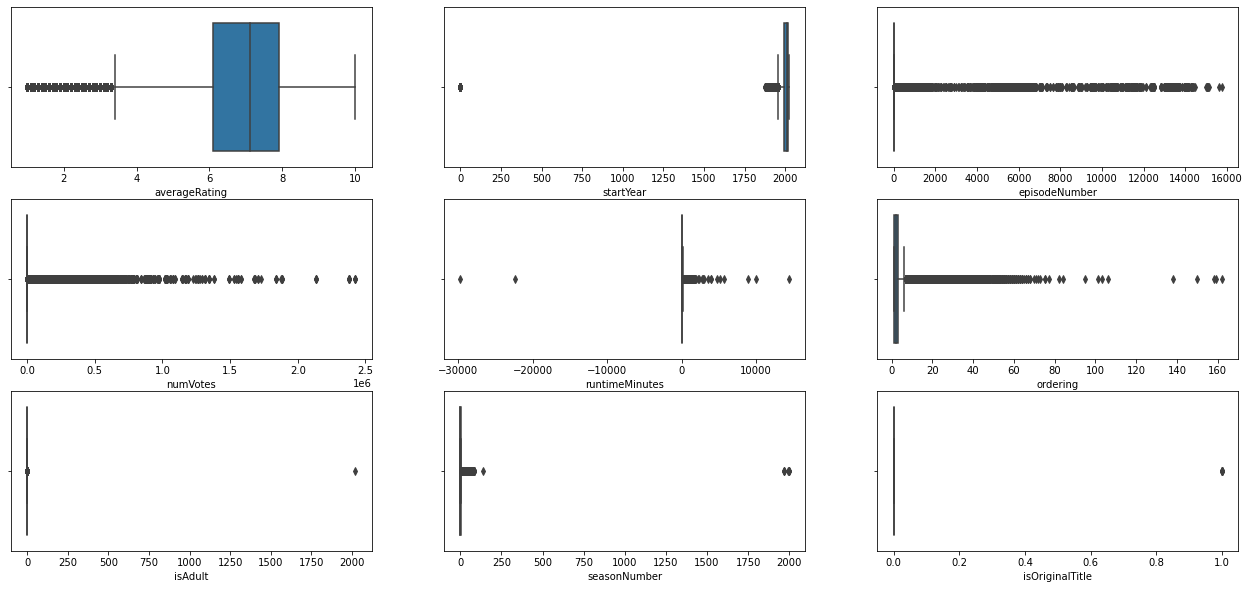

In [81]:
fig, axs = plt.subplots(3,3, figsize=(22, 10))

sns.boxplot(x=df["averageRating"],ax=axs[0,0])
sns.boxplot(x=df["numVotes"],ax=axs[1,0])
sns.boxplot(x=df["isAdult"],ax=axs[2,0])
sns.boxplot(x=df["startYear"],ax=axs[0,1])
sns.boxplot(x=df["runtimeMinutes"],ax=axs[1,1])
sns.boxplot(x=df["seasonNumber"],ax=axs[2,1])
sns.boxplot(x=df["episodeNumber"],ax=axs[0,2])
sns.boxplot(x=df["ordering"],ax=axs[1,2])
sns.boxplot(x=df["isOriginalTitle"],ax=axs[2,2])

plt.show()

In [82]:
#numvotes


In [83]:
#seasonNumber
df[df['seasonNumber']>15].sort_values(by='seasonNumber',ascending=False).head(10)


Id averageRating numVotes  titleType isAdult  startYear endYear  \
180282  1996           7.0        6  tvEpisode     0.0       1996       0   
684660  1996           7.6        5  tvEpisode     0.0       1996       0   
856117  1996           6.4       19  tvEpisode     0.0       1996       0   
528039  1994           5.8       97  tvEpisode     0.0       1994       0   
139968  1967           8.2        7  tvEpisode     0.0       1967       0   
324692  1966           8.8       15  tvEpisode     0.0       1966       0   
777846  1965           6.6       17  tvEpisode     0.0       1965       0   
138110  2017           8.3        8  tvEpisode     0.0       2017       0   
73871   2020           6.2        5  tvEpisode     0.0       2020       0   
129698  2020           6.2        5  tvEpisode     0.0       2020       0   

        runtimeMinutes                      genres_x  directors  ...  \
180282              24  Animation,Comedy,Documentary  nm0486188  ...   
684660              28  Animation,Comedy,Documentary  nm0536160  ...   
856117              28  Animation,Comedy,Documentary  nm0609741  ...   
528039              27  Animation,Comedy,Documentary  nm0637615  ...   
139968              60           Documentary,History  nm0806293  ...   
324692              60           Documentary,History  nm0184152  ...   
777846              60           Documentary,History  nm0281310  ...   
138110              21                             0          0  ...   
73871               30                             0          0  ...   
129698              45                             0          0  ...   

       episodeNumber  ordering  language attributes isOriginalTitle      id  \
180282           161       NaN       NaN        NaN             NaN  180282   
684660           162       NaN       NaN        NaN             NaN  684660   
856117           155       NaN       NaN        NaN             NaN  856117   
528039            74       NaN       NaN        NaN             NaN  528039   
139968             2       1.0         0          0             0.0  139968   
324692             4       2.0         0          0             0.0  324692   
777846             2       2.0         0          0             0.0  777846   
138110             2       1.0         0          0             0.0  138110   
73871             23       NaN       NaN        NaN             NaN   73871   
129698            29       NaN       NaN        NaN             NaN  129698   

       serie exito  director_f  writers_f  
180282     1     0           0          0  
684660     1     0           0          0  
856117     1     0           0          0  
528039     1     0           0          0  
139968     1     0           0          0  
324692     1     0           0          0  
777846     1     0           0          0  
138110     1     0           0          0  
73871      1     0           0          0  
129698     1     0           0          0  

[10 rows x 22 columns]

In [84]:
df = df.drop(df[df['seasonNumber']>=1965].index)


In [85]:
df['genres_x'] = df['genres_x'].astype('str')
df_genres_stack = splitDataFrameList(df[['genres_x','seasonNumber','averageRating']],'genres_x',",")

In [86]:
genres_count=df_genres_stack.groupby('genres_x')[['averageRating']].count().sort_values(by='averageRating',ascending=False).head()
genres_count

averageRating
genres_x                  
Drama               319984
Comedy              304056
Short               130609
Action              118527
Documentary         116159

In [87]:
df_genres_stack.groupby('genres_x')[['seasonNumber']].max().sort_values(by='seasonNumber',ascending=False).head()


seasonNumber
genres_x                 
0                     135
Sport                  77
Documentary            69
News                   69
Music                  69

In [88]:
df[df['genres_x'].notnull()].groupby(['genres_x','directors','writers'])[['averageRating']].count()


averageRating
genres_x directors writers                                                          
0        0         0                                                           15436
                   nm0000138,nm0683434                                             2
                   nm0000402                                                       1
                   nm0000507                                                       1
                   nm0001761                                                       1
...                                                                              ...
Western  nm9383184 nm0275255                                                       1
                   nm0792090                                                       1
                   nm0928068                                                       1
         nm9383199 nm0928068                                                       1
nan      nm1227859 nm0341162,nm0295225,nm0936621,nm2279379,nm07222...              1

[621971 rows x 1 columns]

In [89]:
#startYear
min(datos_cols['startYear']['outliers'])


0

In [90]:
#Episode Number
datos_cols['episodeNumber']['outliers']
df[df['episodeNumber']>1000]

Id averageRating numVotes  titleType isAdult  startYear endYear  \
730     2006           6.7       10  tvEpisode     0.0       2006       0   
906     2007           6.2        5  tvEpisode     0.0       2007       0   
1325    2021           7.6        5  tvEpisode     0.0       2021       0   
1456    2019           7.2        8  tvEpisode     0.0       2019       0   
1768    2018           5.2        5  tvEpisode     0.0       2018       0   
...      ...           ...      ...        ...     ...        ...     ...   
975022  2005           8.2        6  tvEpisode     0.0       2005       0   
976227  2005           7.1        9  tvEpisode     0.0       2005       0   
976358  2018           7.3        7  tvEpisode     0.0       2018       0   
976524  2019           8.9       23  tvEpisode     0.0       2019       0   
976679  2008           8.0        6  tvEpisode     0.0       2008       0   

        runtimeMinutes             genres_x  directors  ... episodeNumber  \
730                  0        Drama,Romance  nm0829985  ...          4938   
906                  0        Drama,Romance          0  ...         10661   
1325                37        Drama,Romance  nm1212523  ...         14022   
1456                 0     Comedy,Talk-Show          0  ...          1239   
1768                 0        Drama,Romance          0  ...         13451   
...                ...                  ...        ...  ...           ...   
975022               0        Drama,Romance  nm0642611  ...          4761   
976227             195        Drama,Romance          0  ...          6028   
976358               0        Drama,Romance          0  ...         13498   
976524               0     Comedy,Talk-Show          0  ...          1368   
976679               0  Crime,Drama,Romance          0  ...         11538   

        ordering  language attributes isOriginalTitle      id serie exito  \
730          NaN       NaN        NaN             NaN     730     1     0   
906          NaN       NaN        NaN             NaN     906     1     0   
1325         NaN       NaN        NaN             NaN    1325     1     0   
1456         NaN       NaN        NaN             NaN    1456     1     0   
1768         NaN       NaN        NaN             NaN    1768     1     0   
...          ...       ...        ...             ...     ...   ...   ...   
975022       NaN       NaN        NaN             NaN  975022     1     0   
976227       NaN       NaN        NaN             NaN  976227     1     0   
976358       NaN       NaN        NaN             NaN  976358     1     0   
976524       NaN       NaN        NaN             NaN  976524     1     0   
976679       NaN       NaN        NaN             NaN  976679     1     0   

        director_f  writers_f  
730              0          0  
906              0          0  
1325             0          0  
1456             0          0  
1768             0          0  
...            ...        ...  
975022           0          0  
976227           0          0  
976358           0          0  
976524           0          0  
976679           0          0  

[2806 rows x 22 columns]

In [91]:
#Is Adult
df.groupby('isAdult')[['Id']].count()


Id
isAdult        
0.0      959215
1.0       18318
2020.0        1

In [92]:
# hay un outlier = 2020 en isAdult 
df.isAdult.replace(2020,0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
977536    0.0
977537    0.0
977538    0.0
977539    0.0
977540    0.0
Name: isAdult, Length: 977534, dtype: float64

In [93]:
#modelo

In [94]:
df_con_dummies = df.merge(dummy_conv_generos, left_index=True, right_index=True).drop(columns = ['genres_x'],axis=1)
df_con_dummies = df_con_dummies[['averageRating','numVotes','isAdult','startYear','runtimeMinutes','seasonNumber',
                                 'episodeNumber','serie','director_f','writers_f',
                                 'Drama','Comedy','Short','Action','Documentary','exito']]

In [95]:
df_test_con_dummies = df_test[['numVotes','isAdult','startYear','runtimeMinutes','seasonNumber',
                                 'episodeNumber','serie','director_f','writers_f',
                                 'Drama','Comedy','Short','Action','Documentary','id','exito']].copy()

In [96]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [97]:
# Separo en train y test
# Let's say we want to split the data in 80:20 for train:valid:test dataset
#train_size=0.6

X = df_con_dummies.loc[:, df_con_dummies.columns != 'averageRating'].copy()
y = df_con_dummies['averageRating']

# In the first step we will split the data in training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(782027, 15)
(782027,)
(195507, 15)
(195507,)


(None, None)

In [98]:
#seleccion de variables

In [99]:
cols_iniciales = ['numVotes','runtimeMinutes','seasonNumber','serie','exito',]

In [100]:
X_train=np.array(X_train[cols_iniciales])


In [101]:
X_test = np.array(X_test[cols_iniciales])


In [102]:
# extra trees regressor

In [103]:
from sklearn.metrics import r2_score


In [104]:
f_mod = []

for i in range(25,35,2):
  print(i)
  regr2 = ExtraTreesRegressor(max_depth=i)
  fregr2 = regr2.fit(X_train,y_train)
  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  f_mod.append([i,r2_train,r2_test])

25
27
29
31
33


In [105]:
scores_profundidad = pd.DataFrame(f_mod, columns=["max_depth","r2_train","r2_test"])
scores_profundidad

max_depth  r2_train   r2_test
0         25  0.265226  0.206165
1         27  0.288639  0.205224
2         29  0.315490  0.198375
3         31  0.332463  0.188191
4         33  0.344375  0.175182

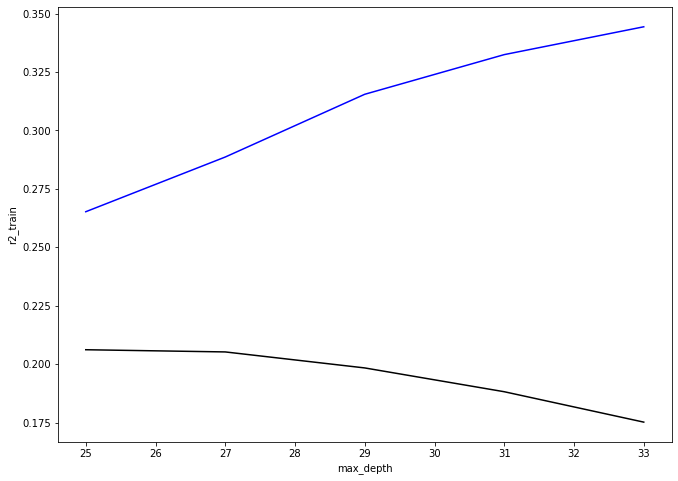

In [106]:
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.lineplot(data=scores_profundidad, x="max_depth", y="r2_train", color = 'blue')
ax = sns.lineplot(data=scores_profundidad, x="max_depth", y="r2_test", color = 'black')

In [107]:
f_mod_2 = []

for i in range(155,171,5):
  regr2 = ExtraTreesRegressor(max_depth=29,n_estimators=i,random_state=42)
  fregr2 = regr2.fit(X_train,y_train)

  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  f_mod_2.append([i,r2_train,r2_test])
  print(f'n_estimators: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

n_estimators: 155 => r2_train: 0.31382265104276297 - r2_test: 0.199207948181497
n_estimators: 160 => r2_train: 0.3138932868661397 - r2_test: 0.19918477084967956
n_estimators: 165 => r2_train: 0.3141937812872976 - r2_test: 0.19910078139652643
n_estimators: 170 => r2_train: 0.3146251791550405 - r2_test: 0.1989070338414135


In [108]:
scores_n_estimators = pd.DataFrame(f_mod_2, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators

n_estimators  r2_train   r2_test
0           155  0.313823  0.199208
1           160  0.313893  0.199185
2           165  0.314194  0.199101
3           170  0.314625  0.198907

In [109]:
regr2 = ExtraTreesRegressor(max_depth=29,n_estimators=160,random_state=42,bootstrap=True)
fregr2 = regr2.fit(X_train,y_train)

In [110]:
fregr2.score(X_train, y_train)

0.3057007661077995

In [111]:
fregr2.score(X_test, y_test)

0.20139024489973667

In [112]:
importances = []
for i in range(len(cols_iniciales)):
  importances.append([cols_iniciales[i], fregr2.feature_importances_[i]])

importances = pd.DataFrame(importances, columns=["feature", "importance"])
importances.sort_values(by='importance',ascending = False)

feature  importance
0        numVotes    0.331048
3           serie    0.330796
1  runtimeMinutes    0.255873
2    seasonNumber    0.068356
4           exito    0.013928

In [113]:
#random forest

In [116]:
f_mod_3 = []

for i in range(17,24,2):
  print(i)
  regr3 = RandomForestRegressor(max_depth=i,random_state=42)
  fregr3 = regr3.fit(X_train,y_train)
  r2_train = fregr3.score(X_train, y_train)
  r2_test = fregr3.score(X_test, y_test)
  f_mod_3.append([i,r2_train,r2_test])
  #print(f'criterion: {c} - max_depth: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

17
19
21
23


In [117]:
scores_profundidad2 = pd.DataFrame(f_mod_3, columns=["max_depth","r2_train","r2_test"])
scores_profundidad2

max_depth  r2_train   r2_test
0         17  0.257009  0.202243
1         19  0.277122  0.197492
2         21  0.294816  0.191045
3         23  0.308880  0.184502

In [118]:
f_mod_4 = []

for i in range(155,171,5):
  regr2 = RandomForestRegressor(max_depth=19,n_estimators=i,random_state=42)
  fregr2 = regr2.fit(X_train,y_train)

  r2_train = fregr2.score(X_train, y_train)
  r2_test = fregr2.score(X_test, y_test)
  f_mod_4.append([i,r2_train,r2_test])
  print(f'n_estimators: {i} => r2_train: {r2_train} - r2_test: {r2_test}')

n_estimators: 155 => r2_train: 0.2772610224807265 - r2_test: 0.19777740138048228
n_estimators: 160 => r2_train: 0.27729103750906214 - r2_test: 0.19775291849105603
n_estimators: 165 => r2_train: 0.27731679088563743 - r2_test: 0.19776409101525816
n_estimators: 170 => r2_train: 0.27735493125672717 - r2_test: 0.19776499847380247


In [119]:
scores_n_estimators2 = pd.DataFrame(f_mod_4, columns=["n_estimators","r2_train","r2_test"])
scores_n_estimators2

n_estimators  r2_train   r2_test
0           155  0.277261  0.197777
1           160  0.277291  0.197753
2           165  0.277317  0.197764
3           170  0.277355  0.197765

In [120]:
rf_optimo = RandomForestRegressor(max_depth=19,n_estimators=165,random_state=42)
rf_optimo = regr2.fit(X_train,y_train)

In [ ]:
score_test = fregr2.score(X_test,y_test)
print("R-squared:", score_test)
print("MSE:", mean_squared_error(y, yfit))

In [ ]:
! pip install mlxtend

In [ ]:
# estimate the bias and variance for a regression model
#corregir - consideracion para el final

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp

In [ ]:
#corregir - consideracion para el final
X_train=X_train.values
y_train=y_train.values

X_test=X_test.values
y_test=y_test.values

In [ ]:
#correr - problemas encontrados
#corregir - consideracion para el final

mse, bias, var = bias_variance_decomp(rf_optimo, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

In [ ]:
#corregir - consideracion para el final
score_test = regr2.score(X_test,y_test)
print("R-squared:", score_test)
print("MSE:", mean_squared_error(y, yfit))

In [122]:
# bagging regressor
from sklearn.ensemble import BaggingRegressor


In [123]:
bag_dt = BaggingRegressor(n_estimators=100, random_state=42)


In [124]:
bag_dt.fit(X_train,y_train)


BaggingRegressor(n_estimators=100, random_state=42)

In [125]:
bag_dt.score(X_train,y_train)


0.34112207613810996

In [126]:
bag_dt.score(X_test,y_test)


0.16257809275851476

In [127]:
bagBoot_dt = BaggingRegressor(bootstrap_features=True, random_state=42)


In [128]:
#ajuste de hiperparametros
estimator_range = [1] + list(range(10,150,20))

scores = []

for estimator in estimator_range:
  bag_dt = BaggingRegressor(n_estimators=estimator, random_state = 0)
  bag_dt.fit(X_train, y_train)
  scores.append(bag_dt.score(X_test,y_test))

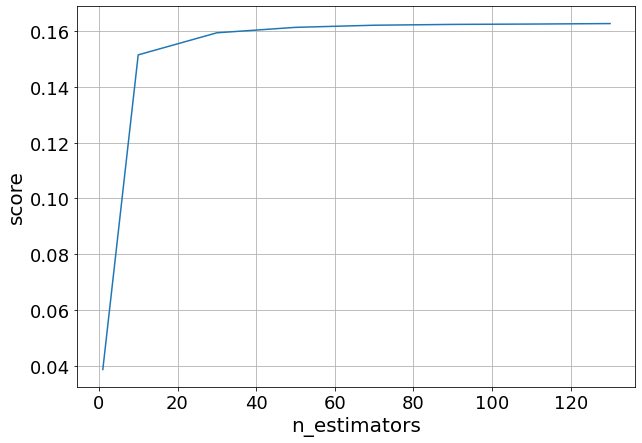

In [129]:
plt.figure(figsize=(10,7))
plt.plot(estimator_range,scores)

plt.xlabel('n_estimators',fontsize=20)
plt.ylabel('score',fontsize=20)
plt.tick_params(labelsize=18)
plt.grid()

In [131]:
pred_rf = rf_optimo.predict(df_test_con_dummies[cols_iniciales])


/Users/violetasaguier/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# Finalmente generar un CSV con los rdos aplicados al CSV de rdos que no contiene la columna target

salida = pd.DataFrame(data={"averageRating": pred_rf}).astype(str)
salida.index = df_test_con_dummies.id
salida.to_csv("randomForest.csv", sep=',',index=True,  index_label='id')

In [ ]:
#Adaboost

In [132]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),n_estimators=300, random_state=0).fit(X_train, y_train)

In [133]:
ada.score(X_train,y_train)

-0.14492702645746003

In [134]:
ada.score(X_test,y_test)

-0.15405490334527538

In [135]:
#bagging trees

In [136]:
from sklearn.ensemble import BaggingRegressor
bagging_tree = BaggingRegressor(DecisionTreeRegressor(), max_samples= 1.0,bootstrap=True, random_state=0).fit(X_train, y_train)

In [137]:
bagging_tree.score(X_train,y_train)

0.33273008324743814

In [138]:
bagging_tree.score(X_test,y_test)

0.15141426429306326

In [ ]:
score = svr.score(X_train,y_train)
print("R-squared:", score)
print("MSE:", mean_squared_error(y, yfit))

In [ ]:
score_test = svr.score(X_test,y_test)
print("R-squared:", score_test)
print("MSE:", mean_squared_error(y, yfit))

In [ ]:
#LightGMB - problemas con la carga

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [ ]:
best_lgb = lgb.LGBMRegressor(task='train', num_iterations=3000, min_data_in_leaf= 35, max_depth=100, learning_rate=0.05,feature_fraction=0.6, boosting='gbdt',bagging_freq=10,bagging_fraction=1, random_state=42)
best_lgb.fit(X_train,y_train)

In [ ]:
preds_lgb_model = best_lgb.predict(X_test)
print('Accuracy',100- (np.mean(np.abs((y_test - preds_lgb_model) / y_test)) * 100))

In [ ]:
boosting_type='gbdt', n_estimators=100,
               class_weight=None, colsample_bytree=1.0,
               learning_rate=0.1, max_depth=-1,                      
               min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, 
               n_jobs=-1, num_leaves=31, objective=None, 
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, 
               silent=True, subsample=1.0, 
               subsample_for_bin=200000, subsample_freq=1

In [ ]:
!pip install mlxtend

In [ ]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# separate into inputs and outputs
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)